In [2]:
! pip install fbprophet
# conda install -c conda-forge fbprophet

In [0]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import os

In [43]:
from matplotlib import pyplot as plt
from fbprophet.plot import plot_plotly

# import plotly.offline as ply
# ply.init_notebook_mode()


# import plotly
# import plotly.plotly as py
# import cufflinks as cf
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.offline as offline
# offline.init_notebook_mode()

# Load and Prep Data

In [0]:
fxtrade_dataset = pd.read_csv('USD_CAD-2019-07-18.csv')
fxcal_dataset = pd.read_csv('calender_2019-07-18.csv', header=None)

In [5]:
fxcal_dataset.columns = ['Date Time','Currency','Impact','Event','Actual','Forecast','Previous']
fxcal_dataset.head()

Date Time Currency  ... Forecast Previous
0  2014-12-29 03:00:00      CHF  ...      NaN     1.32
1  2014-12-29 00:00:00      EUR  ...      NaN      NaN
2  2014-12-30 03:00:00      GBP  ...     0.3%     0.3%
3  2014-12-30 04:00:00      EUR  ...    -0.7%    -0.4%
4  2014-12-30 05:00:00      EUR  ...     2.6%     2.5%

[5 rows x 7 columns]

In [7]:
# fxcal_dataset.dtypes
# fxtrade_dataset.dtypes

FX         object
Time       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [6]:
# Convert Time column to DateTime data type
fxtrade_dataset['Time']=pd.to_datetime(fxtrade_dataset['Time'])
fxtrade_dataset.dtypes

FX                object
Time      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [7]:
fxtrade_dataset.head()

FX       Time      Open     High      Low     Close  Volume
0  USD_CAD 2015-01-01  1.161050  1.17862  1.15999  1.178415   16558
1  USD_CAD 2015-01-04  1.178390  1.18434  1.17434  1.176020   21274
2  USD_CAD 2015-01-05  1.176250  1.18398  1.17304  1.183645   31010
3  USD_CAD 2015-01-06  1.183645  1.18744  1.18133  1.181485   36879
4  USD_CAD 2015-01-07  1.181910  1.18444  1.17968  1.183015   25373

In [8]:
# Convert Time column to DateTime data type 
fxcal_dataset['Date Time']=pd.to_datetime(fxcal_dataset['Date Time'])
fxcal_dataset['Date Time'] = fxcal_dataset['Date Time'].dt.date
fxcal_dataset['Date Time']=pd.to_datetime(fxcal_dataset['Date Time'])
fxcal_dataset.dtypes

Date Time    datetime64[ns]
Currency             object
Impact               object
Event                object
Actual               object
Forecast             object
Previous             object
dtype: object

In [9]:
fxcal_dataset.head()

Date Time Currency                  Impact  ... Actual Forecast Previous
0 2014-12-29      CHF     Low Impact Expected  ...   1.29      NaN     1.32
1 2014-12-29      EUR    High Impact Expected  ...    NaN      NaN      NaN
2 2014-12-30      GBP  Medium Impact Expected  ...   0.2%     0.3%     0.3%
3 2014-12-30      EUR  Medium Impact Expected  ...  -1.1%    -0.7%    -0.4%
4 2014-12-30      EUR  Medium Impact Expected  ...   3.1%     2.6%     2.5%

[5 rows x 7 columns]

In [10]:
fb_trade = fxtrade_dataset.drop(columns=['FX', 'Open','High','Low','Volume'])
fb_trade.rename(columns={"Time":'ds',"Close":'y'}, inplace=True)
fb_trade.head()

ds         y
0 2015-01-01  1.178415
1 2015-01-04  1.176020
2 2015-01-05  1.183645
3 2015-01-06  1.181485
4 2015-01-07  1.183015

In [13]:
# Only use "High Impact Expected" dates from Economic Calendar

# fb_high = fxcal_dataset.loc[((fxcal_dataset['Currency'] == 'USD')  | (fxcal_dataset['Currency'] == 'CAD'))
#                            & (fxcal_dataset['Impact'] == 'High Impact Expected'), 
#                            ['Date Time','Currency','Impact']]
important_dates=[]
important_dates = fxcal_dataset.loc[((fxcal_dataset['Currency'] == 'USD')  | (fxcal_dataset['Currency'] == 'CAD'))
                           & (fxcal_dataset['Impact'] == 'High Impact Expected'), 
                           ['Date Time']]
important_dates.head()

Date Time
8  2014-12-30
14 2014-12-31
48 2014-01-02
77 2015-01-06
91 2015-01-07

In [0]:
ipt_dates=important_dates.iloc[:,0].tolist()
# df.iloc[:, 0].tolist()
# ipt_dates

In [0]:
fb_high=pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(ipt_dates),
  'lower_window': 0,
  'upper_window': 1,
})

In [0]:
# holidays=fb_high

# FaceBook Prophet - Simple (Trading data only)

In [47]:
# Use FaceBook Prophet for Machine learning
model_s = Prophet()
model_s.fit(fb_trade)
# forecast = model_s.fit(fb_trade).predict(future)
future = model_s.make_future_dataframe(periods=42)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
1211 2019-08-18
1212 2019-08-19
1213 2019-08-20
1214 2019-08-21
1215 2019-08-22

In [64]:
forecast = model_s.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds      yhat  yhat_lower  yhat_upper
0    2015-01-01  1.206350    1.189257    1.222910
1    2015-01-04  1.206987    1.189628    1.223183
2    2015-01-05  1.207263    1.189269    1.223920
3    2015-01-06  1.207240    1.189872    1.223689
4    2015-01-07  1.207755    1.191473    1.223883
5    2015-01-08  1.208632    1.192328    1.225744
6    2015-01-11  1.211174    1.195148    1.228484
7    2015-01-12  1.212132    1.194074    1.229806
8    2015-01-13  1.212787    1.196327    1.229984
9    2015-01-14  1.213956    1.196552    1.230834
10   2015-01-15  1.215449    1.196533    1.233387
11   2015-01-18  1.219477    1.202834    1.236564
12   2015-01-19  1.220772    1.204500    1.236345
13   2015-01-20  1.221671    1.205024    1.238894
14   2015-01-21  1.222991    1.206483    1.239347
15   2015-01-22  1.224537    1.208141    1.240613
16   2015-01-25  1.228164    1.210982    1.244423
17   2015-01-26  1.229160    1.209821    1.245414
18   2015-01-27  1.229692    1.212591    1.246926
19   2015-01-28  1.230588    1.215382    1.247923
20   2015-01-29  1.231667    1.214803    1.248748
21   2015-02-01  1.233777    1.216371    1.250840
22   2015-02-02  1.234276    1.218146    1.250781
23   2015-02-03  1.234341    1.217601    1.250581
24   2015-02-04  1.234811    1.219264    1.251133
25   2015-02-05  1.235519    1.219796    1.253144
26   2015-02-08  1.236935    1.219696    1.252986
27   2015-02-09  1.237366    1.220812    1.254046
28   2015-02-10  1.237451    1.219034    1.252751
29   2015-02-11  1.238029    1.219766    1.255045
...         ...       ...         ...         ...
1186 2019-07-24  1.328977    1.311665    1.344991
1187 2019-07-25  1.329339    1.312434    1.345736
1188 2019-07-26  1.319342    1.301988    1.338094
1189 2019-07-27  1.314521    1.297511    1.331837
1190 2019-07-28  1.329675    1.311180    1.346426
1191 2019-07-29  1.329689    1.311488    1.347140
1192 2019-07-30  1.329309    1.312679    1.346622
1193 2019-07-31  1.329364    1.312727    1.346024
1194 2019-08-01  1.329674    1.311789    1.347975
1195 2019-08-02  1.319629    1.301160    1.337576
1196 2019-08-03  1.314764    1.296460    1.333427
1197 2019-08-04  1.329877    1.311137    1.349019
1198 2019-08-05  1.329852    1.310648    1.347863
1199 2019-08-06  1.329433    1.311262    1.348679
1200 2019-08-07  1.329446    1.309827    1.349366
1201 2019-08-08  1.329710    1.310761    1.349218
1202 2019-08-09  1.319613    1.299270    1.338029
1203 2019-08-10  1.314687    1.294994    1.334874
1204 2019-08-11  1.329729    1.309730    1.348909
1205 2019-08-12  1.329620    1.307371    1.349014
1206 2019-08-13  1.329103    1.307787    1.350258
1207 2019-08-14  1.329003    1.307873    1.349822
1208 2019-08-15  1.329138    1.307183    1.349753
1209 2019-08-16  1.318895    1.297194    1.340160
1210 2019-08-17  1.313807    1.292659    1.334778
1211 2019-08-18  1.328672    1.305070    1.352630
1212 2019-08-19  1.328374    1.307083    1.350038
1213 2019-08-20  1.327655    1.305419    1.348589
1214 2019-08-21  1.327346    1.303717    1.349893
1215 2019-08-22  1.327266    1.303261    1.351233

[1216 rows x 4 columns]

## Plot the forecast

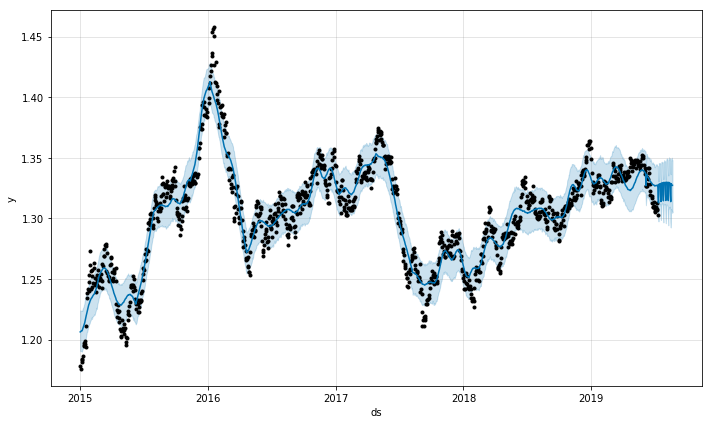

In [49]:
fig1 = model_s.plot(forecast)

##Trend Changepoints

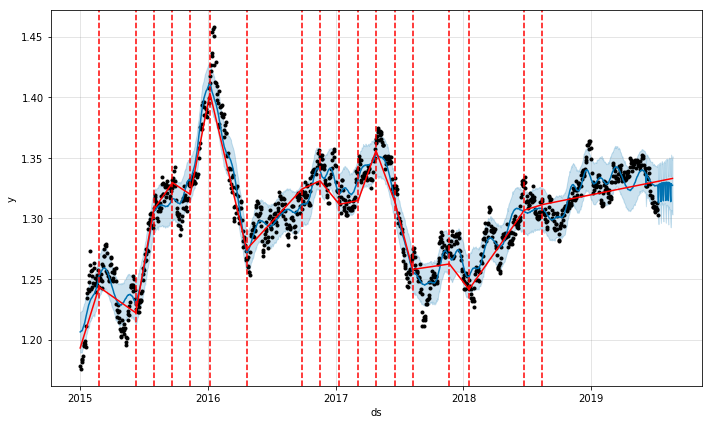

In [68]:
from fbprophet.plot import add_changepoints_to_plot
fig2 = model_s.plot(forecast)
a = add_changepoints_to_plot(fig2.gca(), model_s, forecast)


## Plot forecast components

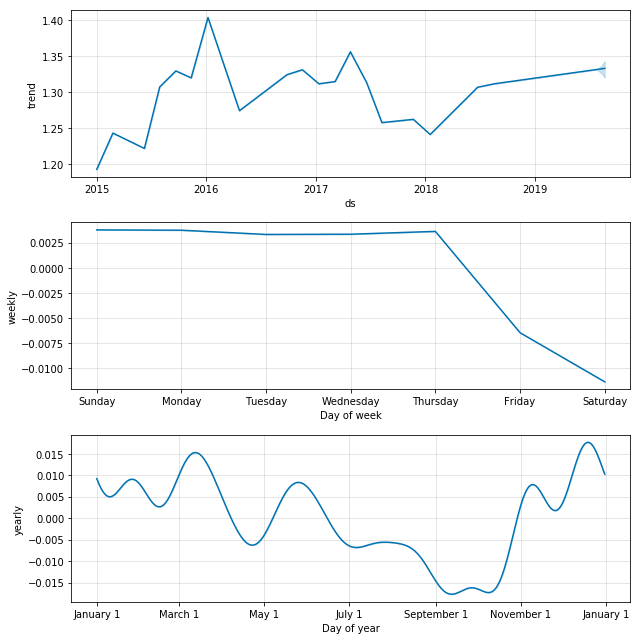

In [51]:
from fbprophet.plot import plot_forecast_component
fig3 = model_s.plot_components(forecast)

# FaceBook Prophet - with Economic Calendar (High Impact Dates only)

In [56]:
# Use FaceBook Prophet for Machine learning
model_cal = Prophet(holidays=fb_high)
model_cal.add_country_holidays(country_name='US')
model_cal.fit(fb_trade)
# future=model.make_future_dataframe(periods=42)
# forecast = model.fit(fb_trade).predict(future)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
model_cal.train_holiday_names

0                         playoff
1                  New Year's Day
2     Martin Luther King, Jr. Day
3           Washington's Birthday
4                    Memorial Day
5                Independence Day
6                       Labor Day
7                    Columbus Day
8                    Veterans Day
9                    Thanksgiving
10                  Christmas Day
11       Christmas Day (Observed)
12      New Year's Day (Observed)
13        Veterans Day (Observed)
14    Independence Day (Observed)
dtype: object

In [66]:
future_cal = model_cal.make_future_dataframe(periods=42)
future_cal.tail()

ds
1211 2019-08-18
1212 2019-08-19
1213 2019-08-20
1214 2019-08-21
1215 2019-08-22

In [62]:
forecast_cal = model_cal.predict(future_cal)
forecast_cal[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
1211 2019-08-18  1.328590    1.307351    1.351403
1212 2019-08-19  1.328225    1.305682    1.351318
1213 2019-08-20  1.329098    1.307674    1.352525
1214 2019-08-21  1.330149    1.309621    1.354205
1215 2019-08-22  1.330739    1.307911    1.354747

## Plot the forecast

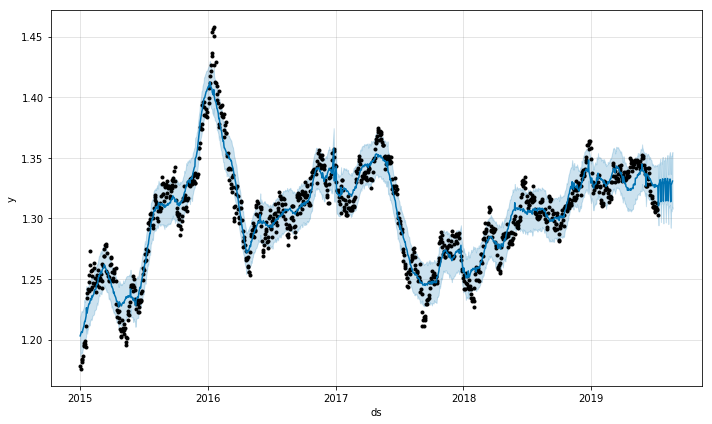

In [63]:
fig_cal_1 = model_cal.plot(forecast_cal)

##Trend Changepoints

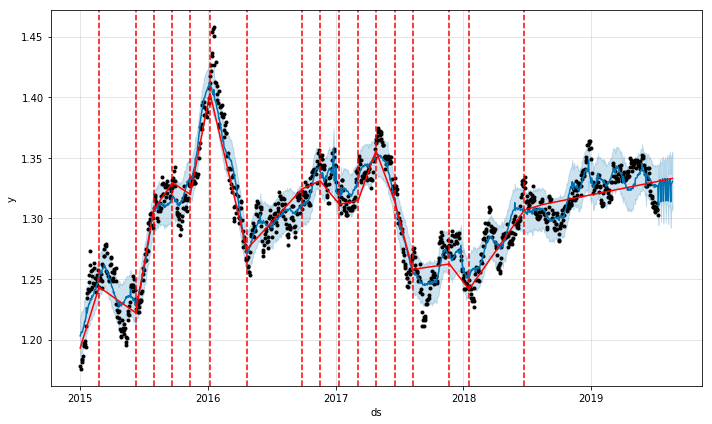

In [69]:
fig_cal_3 = model_cal.plot(forecast_cal)
a = add_changepoints_to_plot(fig_cal_3.gca(), model_cal, forecast)


## Plot forecast components

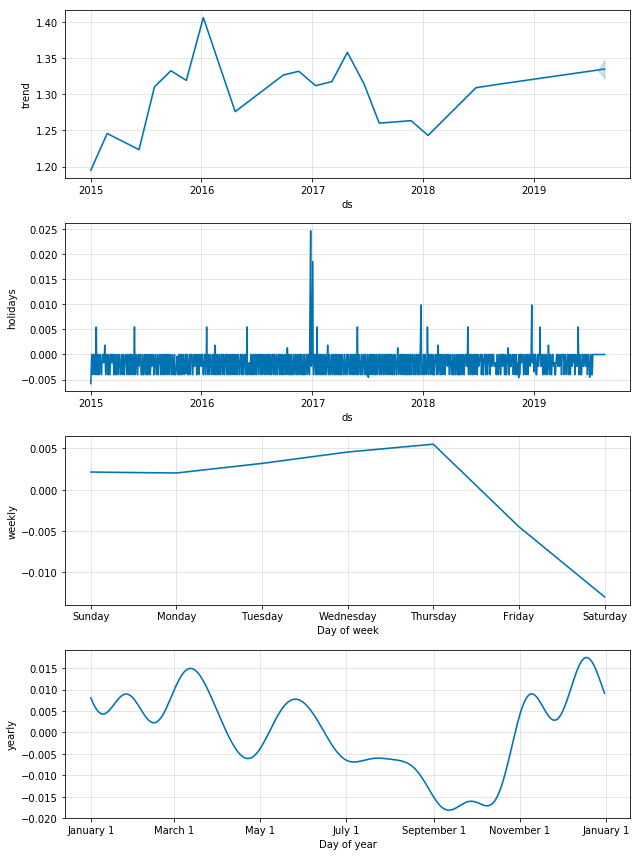

In [61]:
# from fbprophet.plot import plot_forecast_component
# forecast = model_cal.predict(future)
fig_cal_3 = model_cal.plot_components(forecast_cal)

In [0]:
forecast
# yhat is the prediction

ds     trend  ...  multiplicative_terms_upper      yhat
0   2018-02-19  1.276015  ...                         0.0  1.269686
1   2018-02-20  1.276658  ...                         0.0  1.277636
2   2018-02-21  1.277301  ...                         0.0  1.279838
3   2018-02-22  1.277944  ...                         0.0  1.279691
4   2018-02-25  1.279874  ...                         0.0  1.281430
5   2018-02-26  1.280517  ...                         0.0  1.281119
6   2018-02-27  1.281160  ...                         0.0  1.282139
7   2018-02-28  1.281803  ...                         0.0  1.284341
8   2018-03-01  1.282446  ...                         0.0  1.284193
9   2018-03-04  1.284376  ...                         0.0  1.285932
10  2018-03-05  1.285019  ...                         0.0  1.285621
11  2018-03-06  1.285662  ...                         0.0  1.286641
12  2018-03-07  1.286306  ...                         0.0  1.288843
13  2018-03-08  1.286399  ...                         0.0  1.288146
14  2018-03-11  1.286681  ...                         0.0  1.288237
15  2018-03-12  1.286775  ...                         0.0  1.287377
16  2018-03-13  1.286869  ...                         0.0  1.287847
17  2018-03-14  1.286963  ...                         0.0  1.289500
18  2018-03-15  1.287056  ...                         0.0  1.288803
19  2018-03-18  1.287338  ...                         0.0  1.288894
20  2018-03-19  1.287432  ...                         0.0  1.288034
21  2018-03-20  1.287526  ...                         0.0  1.288504
22  2018-03-21  1.287620  ...                         0.0  1.290157
23  2018-03-22  1.287713  ...                         0.0  1.289460
24  2018-03-25  1.285276  ...                         0.0  1.286833
25  2018-03-26  1.284464  ...                         0.0  1.285066
26  2018-03-27  1.283652  ...                         0.0  1.284630
27  2018-03-28  1.282840  ...                         0.0  1.285377
28  2018-03-29  1.282027  ...                         0.0  1.283774
29  2018-04-01  1.279590  ...                         0.0  1.281147
..         ...       ...  ...                         ...       ...
377 2019-07-28  1.312930  ...                         0.0  1.314486
378 2019-07-29  1.312655  ...                         0.0  1.313257
379 2019-07-30  1.312380  ...                         0.0  1.313358
380 2019-07-31  1.312105  ...                         0.0  1.314642
381 2019-08-01  1.311830  ...                         0.0  1.313576
382 2019-08-02  1.311555  ...                         0.0  1.311337
383 2019-08-03  1.311280  ...                         0.0  1.304076
384 2019-08-04  1.311005  ...                         0.0  1.312561
385 2019-08-05  1.310730  ...                         0.0  1.311332
386 2019-08-06  1.310455  ...                         0.0  1.311433
387 2019-08-07  1.310180  ...                         0.0  1.312717
388 2019-08-08  1.309905  ...                         0.0  1.311651
389 2019-08-09  1.309630  ...                         0.0  1.309412
390 2019-08-10  1.309355  ...                         0.0  1.302151
391 2019-08-11  1.309080  ...                         0.0  1.310636
392 2019-08-12  1.308805  ...                         0.0  1.309407
393 2019-08-13  1.308530  ...                         0.0  1.309508
394 2019-08-14  1.308255  ...                         0.0  1.310792
395 2019-08-15  1.307980  ...                         0.0  1.309726
396 2019-08-16  1.307705  ...                         0.0  1.307487
397 2019-08-17  1.307430  ...                         0.0  1.300226
398 2019-08-18  1.307155  ...                         0.0  1.308711
399 2019-08-19  1.306880  ...                         0.0  1.307482
400 2019-08-20  1.306605  ...                         0.0  1.307583
401 2019-08-21  1.306330  ...                         0.0  1.308867
402 2019-08-22  1.306055  ...                         0.0  1.307801
403 2019-08-23  1.305780  ...                         0.0  1.305562


In [0]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
402 2019-08-22  1.307801    1.290090    1.325717
403 2019-08-23  1.305562    1.286384    1.324767
404 2019-08-24  1.298301    1.277438    1.317329
405 2019-08-25  1.306786    1.286332    1.326223
406 2019-08-26  1.305557    1.284582    1.326933

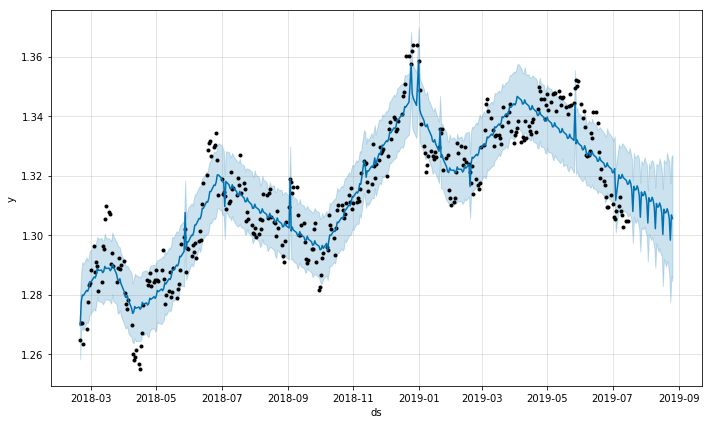

In [0]:
plot=model.plot(forecast)

In [0]:
# f"{fx_name}-{td}.csv"
forecast.to_csv(f"{fx_name}-{td}-output.csv")

# **ARIMA Model**

In [0]:
dataset.head()

Unnamed: 0       FX         ds     Open     High      Low         y  Volume
0           0  USD_CAD 2018-02-19  1.25623  1.26492  1.25566  1.264810   81445
1           1  USD_CAD 2018-02-20  1.26495  1.27039  1.26252  1.270355   94097
2           2  USD_CAD 2018-02-21  1.27035  1.27585  1.26718  1.270555   84989
3           3  USD_CAD 2018-02-22  1.27052  1.27260  1.26155  1.263390   76401
4           4  USD_CAD 2018-02-25  1.26419  1.27119  1.26148  1.268585   62204

In [0]:
# Use ARIMA model for machine learning
# Reset dataset index as ARIMA model requires datetime as index
arima_data = dataset.set_index('ds')

arima_data.drop(columns=['FX','Unnamed: 0'],inplace=True)
arima_data.head()

Open     High      Low         y  Volume
ds                                                     
2018-02-19  1.25623  1.26492  1.25566  1.264810   81445
2018-02-20  1.26495  1.27039  1.26252  1.270355   94097
2018-02-21  1.27035  1.27585  1.26718  1.270555   84989
2018-02-22  1.27052  1.27260  1.26155  1.263390   76401
2018-02-25  1.26419  1.27119  1.26148  1.268585   62204

In [0]:
arima_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-02-19 to 2019-07-15
Data columns (total 5 columns):
Open      365 non-null float64
High      365 non-null float64
Low       365 non-null float64
y         365 non-null float64
Volume    365 non-null int64
dtypes: float64(4), int64(1)
memory usage: 17.1 KB


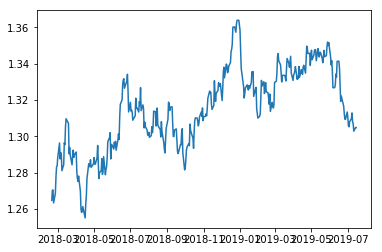

In [0]:
# Plot data for visual 
plt.plot(arima_data.index,arima_data.y)
plt.show()

TypeError: ignored

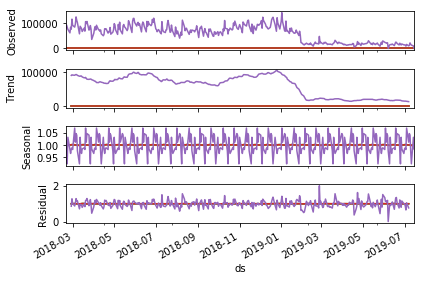

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.plotly import plot_mpl
result = seasonal_decompose(arima_data, model='multiplicative', freq = 12)
# print(result)
# Plot didn't work in class
# fit = result.plot()
# plt.show()
fig = result.plot()
# plot(fig)

In [0]:
! pip install pyramid.arima

     |████████████████████████████████| 604kB 2.9MB/s 


In [0]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(arima_data,start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())


ValueError: ignored